In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table


In [2]:
rv_df  = pd.read_csv('comb_rvs.csv')
table4 = pd.read_csv('table4.csv')

In [13]:
galah = Table.read('../../lithium/data/GALAH_DR3_main_allstar_v2.fits').to_pandas()

In [3]:
binary_list_113 = 1, 4, 5, 7, 9, 11, 16, 18, 19, 21, 23  
binary_list_112 = 5, 6, 7, 13, 23

,sobject_id,ra_dr2,dec_dr2
9,140707003101315,337.265875,-6.423480
10,170509005201208,258.746905,-18.252141


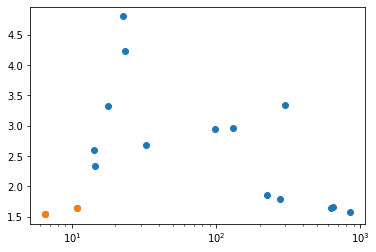

In [24]:
plt.scatter(table4.Mj50, table4.Li_val)
plt.xscale('log')

mask = (table4.Mj50<12)
plt.scatter(table4[mask].Mj50, table4[mask].Li_val)

table4[mask][['sobject_id','ra_dr2','dec_dr2']]

In [27]:
tess_ids = {
    1: {'GAIA': 4134444748741183488, 
     'TESS': 78326923,
     'GALAH': 170509005201208},
    2: {'GAIA': 2622883652325300992, 
     'TESS': 205846638,
     'GALAH': 140707003101315},}


In [23]:
pd.read_csv('../files/crossmatch_tess.csv')[['GAIA','TIC','WISEA','2MASS','ra_dr2','dec_dr2','RAJ2000','DEJ2000']]

,GAIA,TIC,WISEA,2MASS,ra_dr2,dec_dr2,RAJ2000,DEJ2000
0,4134444748741183488,78326923,J171459.26-181507.6,17145926-1815075,258.746905,-18.252141,258.746931,-18.252119
1,2622883652325300992,205846638,J222903.80-062524.5,22290380-0625244,337.265875,-6.423480,337.265848,-6.423464


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

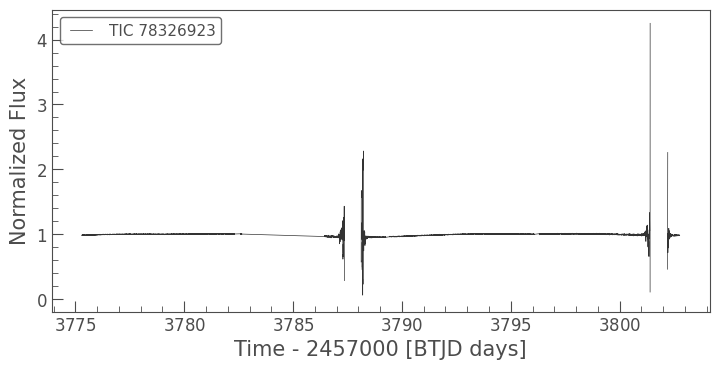

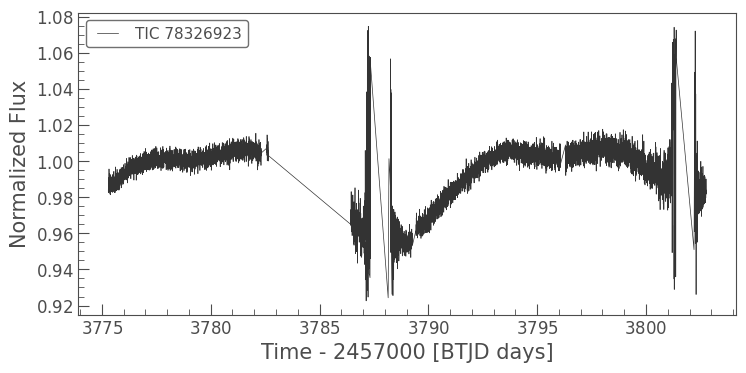

In [81]:
import lightkurve as lk
sr1 = lk.search_lightcurve('TIC 78326923', mission='TESS')
lc1 = sr1.download()
lc1.plot()
lc1 = lc1.remove_nans().remove_outliers() 
lc1.plot()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

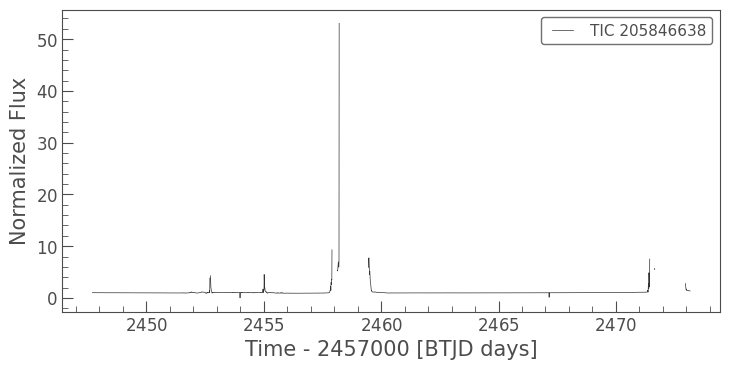

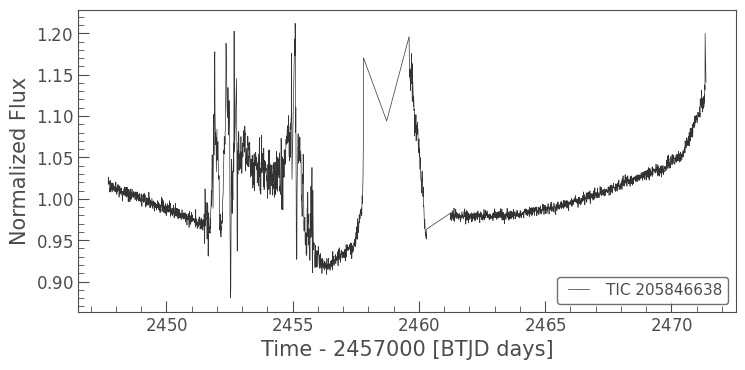

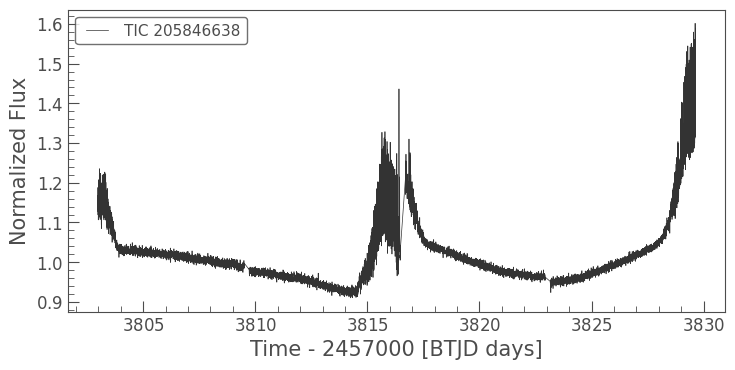

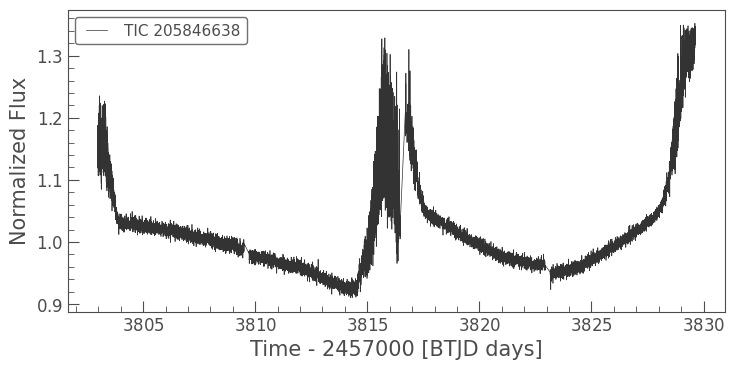

In [83]:
sr2 = lk.search_lightcurve('TIC 205846638', mission='TESS')
lc2 = sr2.download_all()
lc2[0].plot()
lc2a = lc2[0].remove_nans().remove_outliers()
lc2a.plot()

lc2[1].plot()
lc2b = lc2[1].remove_nans().remove_outliers()
lc2b.plot()

In [86]:
print('cadence in days:',np.median(np.diff(lc1['time'].value)))
print('cadence in mins:',np.median(np.diff(lc1['time'].value))*86400./60)
print('cadence in seconds:',np.median(np.diff(lc1['time'].value))*86400.)

cadence in days: 0.002314981728886778
cadence in mins: 3.3335736895969603
cadence in seconds: 200.01442137581762


In [93]:
sr2
print('cadence in days:',np.median(np.diff(lc2[0]['time'].value)))
print('cadence in mins:',np.median(np.diff(lc2[0]['time'].value))*86400./60)
print('cadence in seconds:',np.median(np.diff(lc2[0]['time'].value))*86400.)
print('\n')
print('cadence in days:',np.median(np.diff(lc2[1]['time'].value)))
print('cadence in mins:',np.median(np.diff(lc2[1]['time'].value))*86400./60)
print('cadence in seconds:',np.median(np.diff(lc2[1]['time'].value))*86400.)

cadence in days: 0.0069444245909835445
cadence in mins: 9.999971411016304
cadence in seconds: 599.9982846609782


cadence in days: 0.002315036170557505
cadence in mins: 3.3336520856028073
cadence in seconds: 200.01912513616844


<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{ppm}$]'>

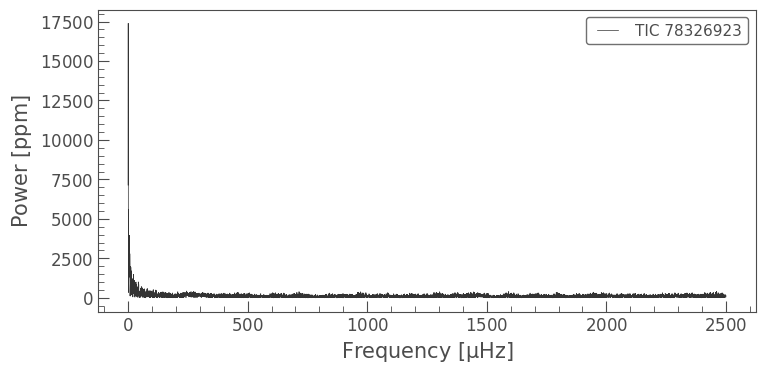

In [97]:
pg1 = lc1.normalize(unit='ppm').to_periodogram(freq_unit=u.microHertz)
pg1.plot()

<Axes: xlabel='Frequency [$\\mathrm{\\mu Hz}$]', ylabel='Power [$\\mathrm{ppm}$]'>

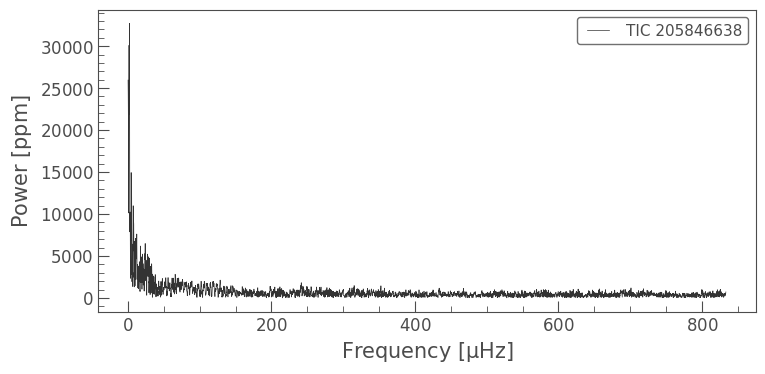

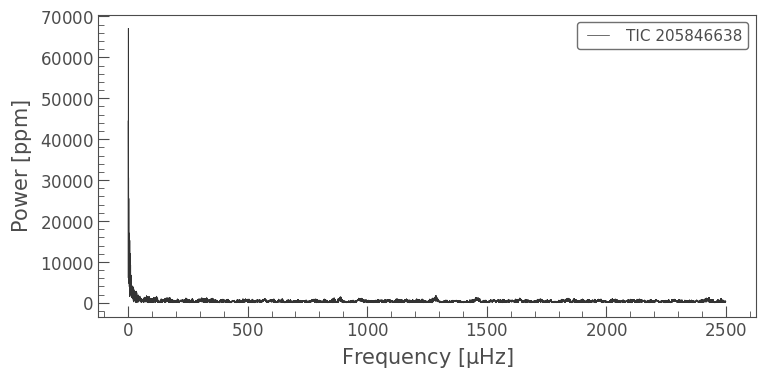

In [96]:
import astropy.units as u

pg2 = lc2a.normalize(unit='ppm').to_periodogram(freq_unit=u.microHertz)
pg2.plot()
pg2 = lc2b.normalize(unit='ppm').to_periodogram(freq_unit=u.microHertz)
pg2.plot()

In [49]:
lc1[0].meta

{'INHERIT': 'T',
 'EXTNAME': 'PRIMARY',
 'EXTVER': 1,
 'TELESCOP': 'TESS',
 'INSTRUME': 'TESS Photometer',
 'OBJECT': 'TIC 78326923',
 'TICID': 78326923,
 'RADESYS': 'ICRS',
 'RA_OBJ': 258.74693147,
 'DEC_OBJ': -18.2521191934,
 'RA_ORIG': 258.746904784,
 'DEC_ORIG': -18.2521410499,
 'EQUINOX': 2000.0,
 'TIMEREF': 'SOLARSYSTEM',
 'TASSIGN': 'SPACECRAFT',
 'TIMESYS': 'TDB',
 'BJDREFI': 2457000,
 'BJDREFR': 0.0,
 'TIMEUNIT': 'd',
 'TELAPS': 27.47185214777346,
 'TSTART': 3775.289292419204,
 'TSTOP': 3802.7611445669772,
 'TIMEDEL': 0.002314814814814814,
 'MJD-BEG': 60774.78929241933,
 'MJD-END': 60802.261144566815,
 'BESTAP': '3.0:4.0:3.0',
 'SMALLAP': '2.5:4.0:3.0',
 'LARGEAP': '3.5:5.0:4.0',
 'DETMET': 'QSP',
 'KSPPENCO': 0.75,
 'KSPBSMIN': 0.3,
 'KSPBSMAX': 2.5,
 'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 0,
 'EXTEND': True,
 'NEXTEND': 1,
 'ORIGIN': 'MIT/QLP',
 'FILTER': 'TESS',
 'SECTOR': 91,
 'CAMERA': 4,
 'CCD': 1,
 'TESSMAG': 11.1119,
 'RADIUS': 9.00706,
 'LOGG': -1.0,
 'MASS': -1.0,
 

In [50]:
lc2[0].meta

{'INHERIT': 'T',
 'EXTNAME': 'PRIMARY',
 'EXTVER': 1,
 'TELESCOP': 'TESS',
 'INSTRUME': 'TESS Photometer',
 'OBJECT': 'TIC 205846638',
 'TICID': 205846638,
 'RADESYS': 'ICRS',
 'RA_OBJ': 337.265848366,
 'DEC_OBJ': -6.4234635484,
 'RA_ORIG': 337.265874618,
 'DEC_ORIG': -6.42348004522,
 'EQUINOX': 2000.0,
 'TIMEREF': 'SOLARSYSTEM',
 'TASSIGN': 'SPACECRAFT',
 'TIMESYS': 'TDB',
 'BJDREFI': 2457000,
 'BJDREFR': 0.0,
 'TIMEUNIT': 'd',
 'TELAPS': 25.4650584081437,
 'TSTART': 2447.696809807398,
 'TSTOP': 2473.161868215541,
 'TIMEDEL': 0.006944444444444444,
 'MJD-BEG': 59447.19680980733,
 'MJD-END': 59472.66186821554,
 'BESTAP': '2.5:4.0:3.0',
 'SMALLAP': '1.75:4.0:3.0',
 'LARGEAP': '3.0:4.0:3.0',
 'KSPPENCO': 0.75,
 'KSPBSMIN': 0.3,
 'KSPBSMAX': 1.5,
 'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 0,
 'EXTEND': True,
 'NEXTEND': 1,
 'ORIGIN': 'MIT/QLP',
 'FILTER': 'TESS',
 'SECTOR': 42,
 'CAMERA': 1,
 'CCD': 3,
 'TESSMAG': 12.5197,
 'RADIUS': 5.18211,
 'LOGG': -1.0,
 'MASS': -1.0,
 'TEFF': 4955.0,
 '

In [22]:
for c in pd.read_csv('../files/crossmatch_tess.csv').keys():
    print(c)

ra_dr2
dec_dr2
TIC
RAJ2000
DEJ2000
errHalfMaj
errHalfMin
errPosAng
HIP
TYC
UCAC4
2MASS
objID
WISEA
GAIA
APASS
KIC
S/G
Ref
r_Pos
pmRA
e_pmRA
pmDE
e_pmDE
r_pm
Plx
e_Plx
r_Plx
Bmag
e_Bmag
Vmag
e_Vmag
umag
e_umag
gmag_x
e_gmag_x
rmag
e_rmag
imag
e_imag
zmag
e_zmag
Jmag
e_Jmag
Hmag
e_Hmag
Kmag
e_Kmag
q_2MASS
W1mag
e_W1mag
W2mag
e_W2mag
W3mag
e_W3mag
W4mag
e_W4mag
Gmag_xa
e_Gmag_xa
Tmag
e_Tmag
f_Tmag
Flag
Teff
s_Teff
logg
s_logg
[M/H]
e_[M/H]
Rad
s_Rad
Mass
s_Mass
rho
s_rho
LClass
Lum
s_Lum
Dist
s_Dist
E(B-V)
s_E(B-V)
Ncont
Rcont
Disp
m_TIC
Prior
e_E(B-V)_x
E_E(B-V)_xa
f_E(B-V)
e_Mass_x
E_Mass_xa
e_Rad_x
E_Rad_xa
e_rho_x
E_rho_xa
e_logg_x
E_logg_xa
e_Lum_x
E_Lum_xa
e_Dist_x
E_Dist_xa
r_Dist
e_Teff_x
E_Teff_xa
r_Teff
BPmag
e_BPmag
RPmag
e_RPmag
q_Gaia
r_Vmag
r_Bmag
Clist
e_RAJ2000
e_DEJ2000
RAOdeg
DEOdeg
e_RAOdeg
e_DEOdeg
RadFl
WDFl
ID
angDist
